# Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dropout, Dense
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import Callback
import numpy as np


from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import time

import pandas as pd
from sklearn.metrics import r2_score, root_mean_squared_error

In [ ]:
data = pd.read_csv('GOOGL_2006-01-01_to_2018-01-01.csv', parse_dates=['Date'])

data = data.drop("Name", axis=1)
data.set_index('Date', inplace=True)


# Ensure data has business day frequency
data = data.asfreq('b')

# Fill missing values
data = data.fillna(method='bfill').fillna(method='ffill')



#Normalize
train_ratio = 0.8
val_ratio = 0.1
train_end_idx = int(data.shape[0] * train_ratio)
val_end_idx = int(data.shape[0] * (train_ratio + val_ratio))

#scaler = StandardScaler()
scaler = MinMaxScaler(feature_range=(-1, 1))
data.iloc[:train_end_idx] = scaler.fit_transform(data.iloc[:train_end_idx])
data.iloc[train_end_idx:] = scaler.transform(data.iloc[train_end_idx:])


/tmp/ipykernel_107846/1828289952.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='bfill').fillna(method='ffill')


# RNN part

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd
from sklearn.metrics import mean_squared_error

# Normalize the data (apply MinMaxScaler across all features)
scaler = MinMaxScaler(feature_range=(-1, 1))
#scaler = StandardScaler()
data_normalized = scaler.fit_transform(data)

# Define sequence length
sequence_length = 100

# Prepare input (X) and output (Y) sequences
X, Y = [], []
for i in range(len(data_normalized) - sequence_length):
    X.append(data_normalized[i:i + sequence_length])  # Input: sequence_length x num_features
    Y.append(data_normalized[i + sequence_length])    # Output: num_features

X = np.array(X)  # Shape: (samples, sequence_length, num_features)
Y = np.array(Y)  # Shape: (samples, num_features)

# Split the data into training and testing sets
split_ratio = 0.8
split_index = int(split_ratio * len(X))
X_train, X_test = X[:split_index], X[split_index:]
Y_train, Y_test = Y[:split_index], Y[split_index:]

In [41]:
# Build the RNN model for multivariate input/output
model = Sequential([
    SimpleRNN(units=80, input_shape=(sequence_length, X.shape[2])),  # Sequence length and features
    Dense(units=Y.shape[1])  # Number of output features
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, Y_train, epochs=20, batch_size=20, verbose=1)

# Predict on the test set
predictions = model.predict(X_test)

# Inverse scale predictions and actual values for evaluation
predictions_rescaled = scaler.inverse_transform(predictions)
Y_test_rescaled = scaler.inverse_transform(Y_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(Y_test_rescaled, predictions_rescaled)
print(f"Mean Squared Error: {mse}")


Epoch 1/20


/home/irene/.local/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


122/122 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1599
Epoch 2/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0537
Epoch 3/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0489
Epoch 4/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0496
Epoch 5/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0502
Epoch 6/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0535
Epoch 7/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0497
Epoch 8/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0557
Epoch 9/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0474
Epoch 10/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0491
Epoch 11/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0512
Epoch 12/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0504
Epoch 13/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0478
Epoch 14/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0484
Epoch 15/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step 

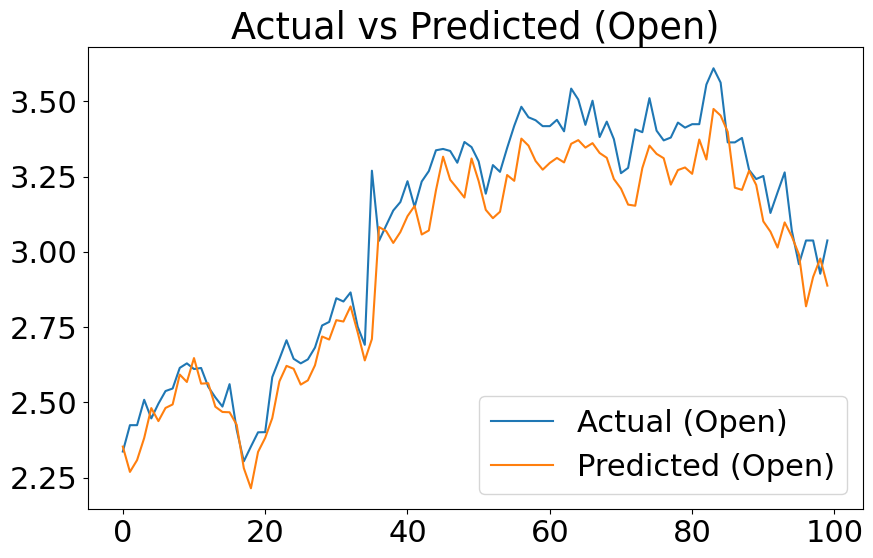

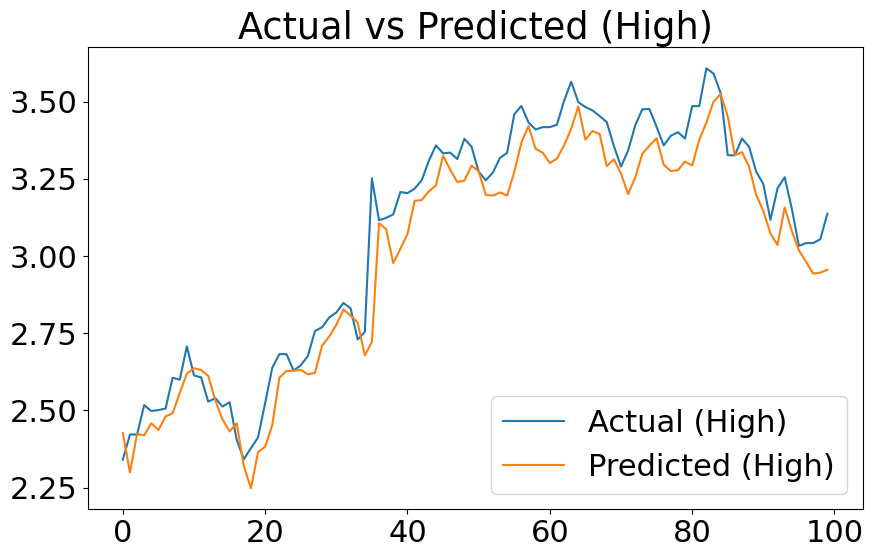

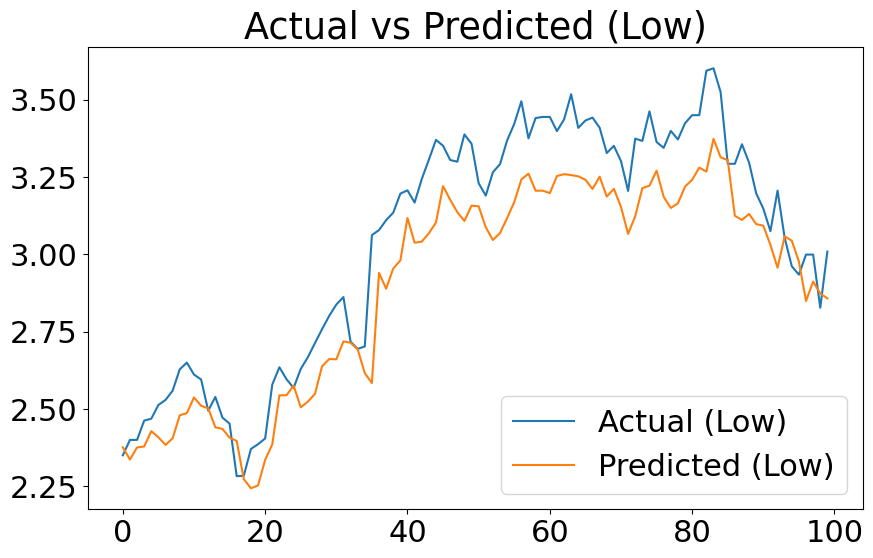

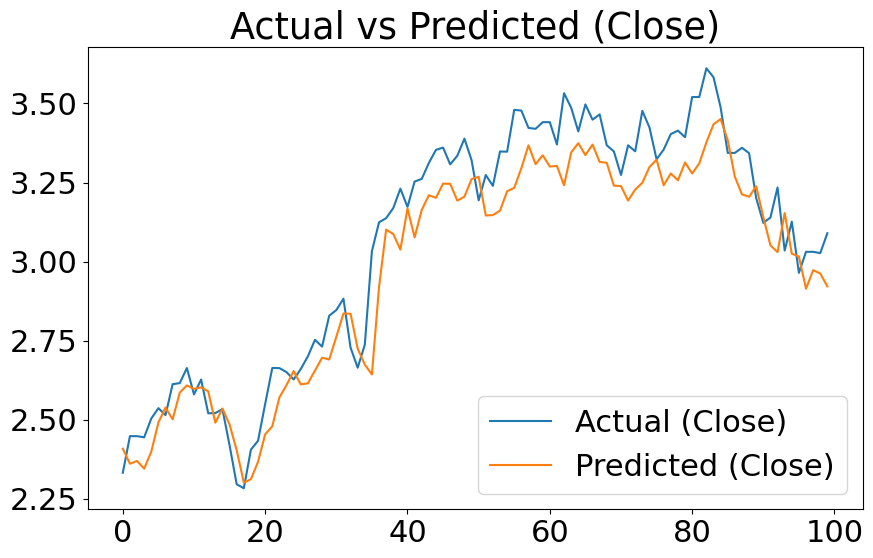

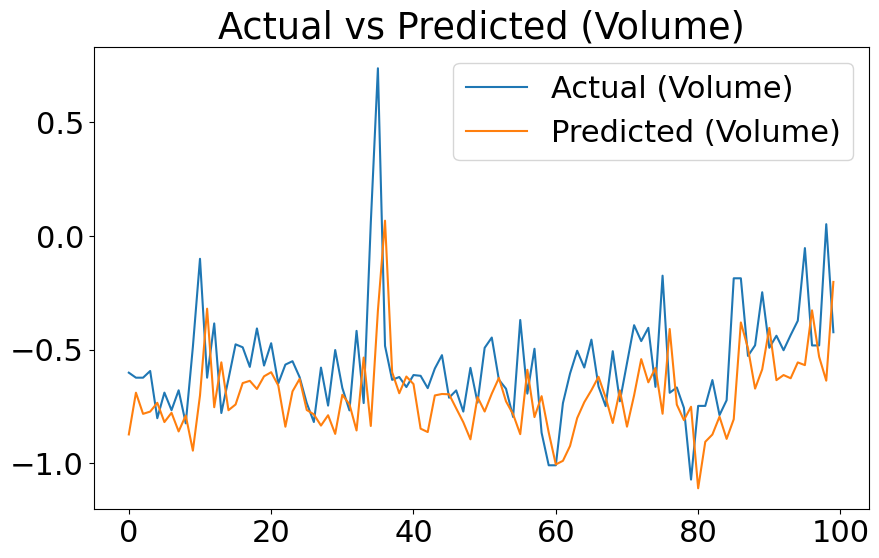

In [42]:
# Optional: Visualize some predictions vs actuals
import matplotlib.pyplot as plt
variables=['Open', 'High', 'Low', 'Close', 'Volume']
for i in range(0,5):
    variable=variables[i]
    plt.figure(figsize=(10, 6))
    plt.plot(Y_test_rescaled[:100, i], label='Actual ('+variable+')')
    plt.plot(predictions_rescaled[:100, i], label='Predicted ('+variable+')')
    plt.legend()
    plt.title("Actual vs Predicted ("+variable+")")
    plt.show()

In [43]:
# Initialize prediction_X with the last sequence from the dataset
prediction_X = X[0]  # Ensure this is a sequence of shape (sequence_length, num_features)

# Number of steps to forecast
steps = 100

# Store forecasts
forecasts = []

for i in range(steps):
    # Reshape prediction_X to include batch dimension
    prediction_X_batch = prediction_X.reshape((1, prediction_X.shape[0], prediction_X.shape[1]))

    # Predict the next step
    forecast_new = model.predict(prediction_X_batch)

    # Add the prediction to forecasts
    forecasts.append(forecast_new[0])  # Remove batch dimension from prediction

    # Update prediction_X: Remove the first value and append the new prediction
    prediction_X = np.vstack([prediction_X[1:], forecast_new])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━

In [44]:
# Convert forecasts to a NumPy array for further processing
forecasts = np.array(forecasts)

# Inverse transform the forecasts if needed (to return to original scale)
forecasts_rescaled = scaler.inverse_transform(forecasts)
print("Forecasts (original scale):")
print(forecasts_rescaled)


Forecasts (original scale):
[[-1.1617538  -0.97876936 -1.1716685  -1.145771    1.584829  ]
 [-1.103649   -1.2233287  -1.0787785  -1.1207653   1.4207891 ]
 [-1.1555203  -1.0908748  -1.1313002  -1.1543329   1.523012  ]
 [-1.0415897  -1.0788563  -1.1638489  -1.2051331   1.311209  ]
 [-1.1134089  -1.1931933  -1.06359    -1.1104555   1.5051032 ]
 [-1.0152354  -1.0343679  -1.1488137  -1.1607448   1.4237411 ]
 [-1.026482   -1.0761324  -1.0610648  -1.156679    1.4062257 ]
 [-1.0200557  -1.085666   -1.0614824  -1.098825    1.4763801 ]
 [-0.96608764 -1.0045704  -1.0621094  -1.1042243   1.3982532 ]
 [-1.0045469  -1.0072265  -1.0129061  -1.0814997   1.3881224 ]
 [-0.9333579  -1.0261642  -1.012197   -1.03017     1.3936802 ]
 [-0.9381258  -0.9552826  -0.9958846  -1.0394093   1.395972  ]
 [-0.91247886 -0.95487267 -0.97173685 -1.0222017   1.3709857 ]
 [-0.9053759  -0.9582967  -0.9524422  -0.9870153   1.4503497 ]
 [-0.8764271  -0.9005187  -0.95006126 -1.0005157   1.3868495 ]
 [-0.8806291  -0.9182301  -

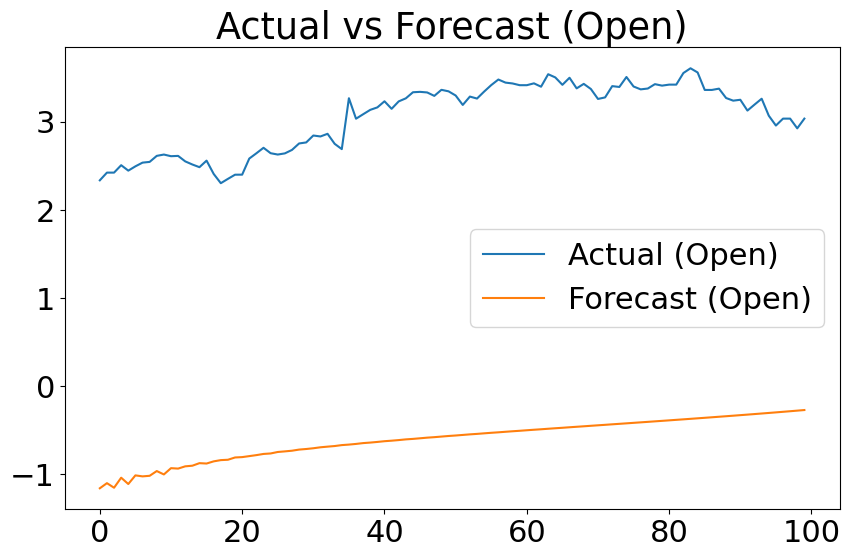

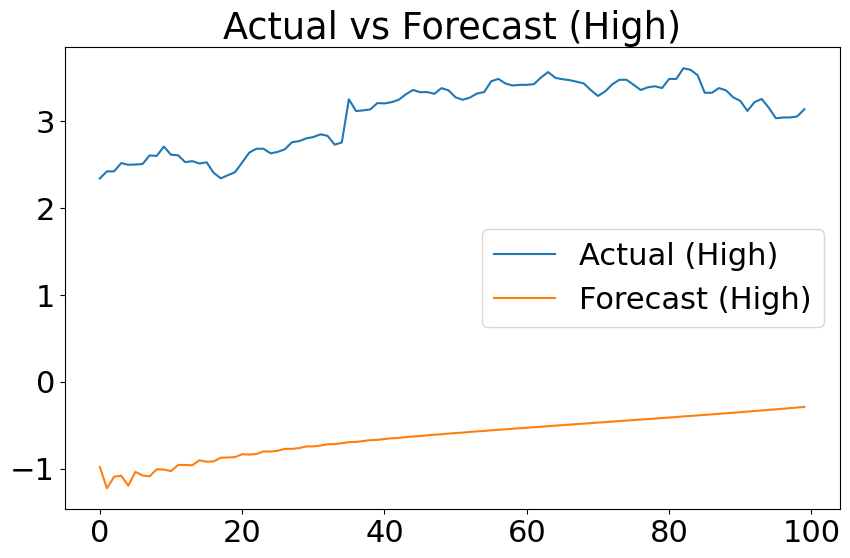

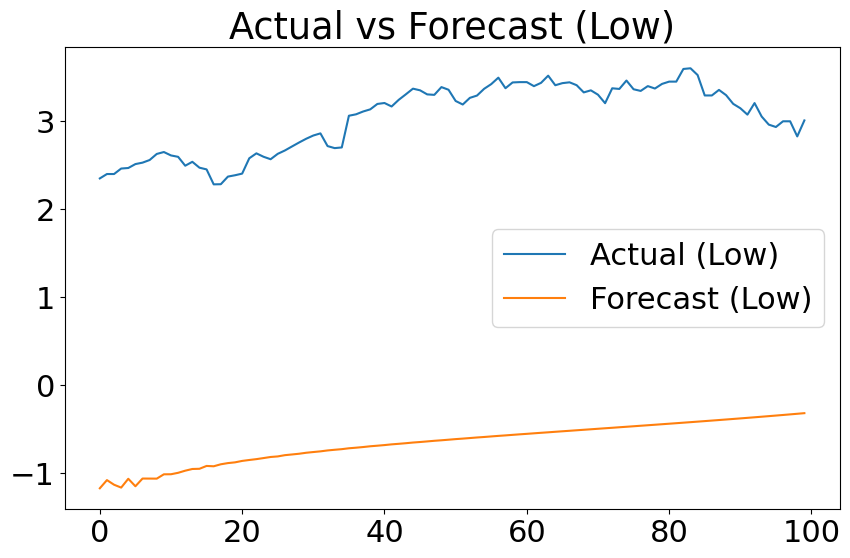

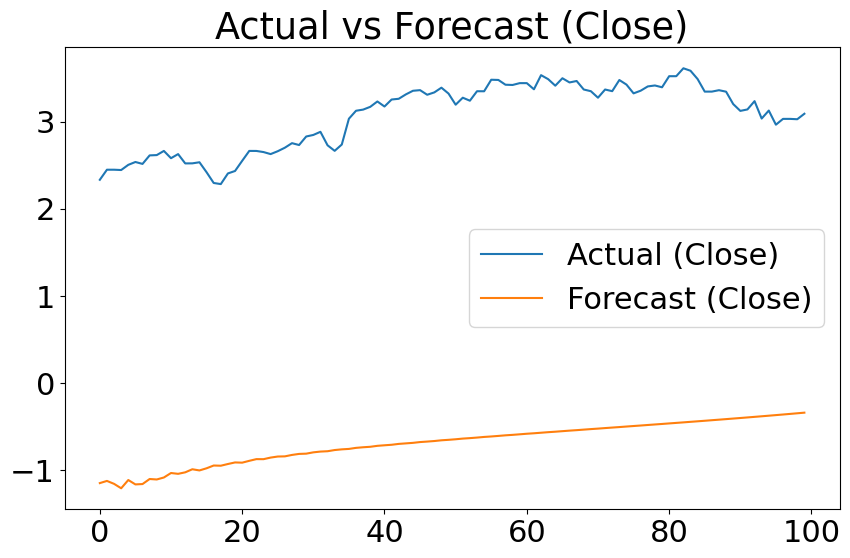

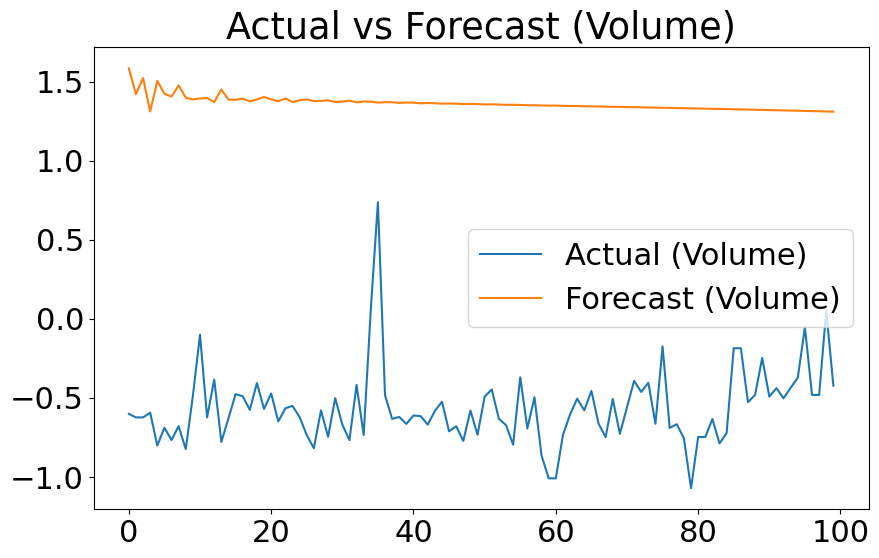

In [45]:
for i in range(0,5):
    variable=variables[i]
    plt.figure(figsize=(10, 6))
    plt.plot((Y_test_rescaled[:100, i]), label='Actual ('+variable+')')
    plt.plot(forecasts_rescaled[:100,i], label='Forecast ('+variable+')')
    plt.legend()
    plt.title("Actual vs Forecast ("+variable+")")
    plt.show()